In [1]:
#task:

#1. In-depth analysis of David Warner's performance

#2. Score distribution for teams by Innings

In [2]:
import seaborn as sns # to make colorful graphs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# df is 2 dimensional data structure that has rows and columns

# in df, index starts from 0 (in excel, index starts from 1)

df= pd.read_csv('C:\datascience\DataScience05/deliveries.csv')

In [4]:
df.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
# make a filter that only shows df['batsman'] == 'DA Warner'

filter= df['batsman']=='DA Warner'

# pass the filter in your dataframd

df_warner= df[filter]
df_warner.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
df_warner.shape

(2902, 21)

In [7]:
df_warner['dismissal_kind'].value_counts()

caught               62
bowled               21
run out               8
stumped               4
lbw                   4
caught and bowled     2
hit wicket            1
Name: dismissal_kind, dtype: int64

<AxesSubplot:ylabel='dismissal_kind'>

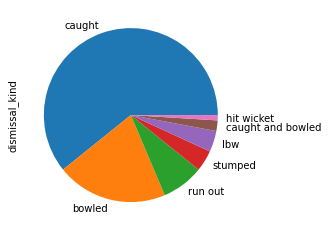

In [8]:
df_warner['dismissal_kind'].value_counts().plot.pie()

In [9]:
df_warner['batsman_runs'].unique()

array([0, 4, 6, 1, 2, 3], dtype=int64)

In [10]:
# see the structure of the code, this is important

len (df_warner[df_warner['batsman_runs']==4])

401

In [11]:
len (df_warner[ df_warner['batsman_runs']==6])

160

In [12]:
len( df_warner[ df_warner['batsman_runs']==1])

997

In [13]:
len (df_warner[ df_warner['batsman_runs']==2])

207

In [14]:
len (df_warner[ df_warner['batsman_runs']==3])

13

In [15]:
def count(df_warner, runs):
    return len (df_warner[ df_warner['batsman_runs']==runs])*runs

In [16]:
count(df_warner, 1)

997

In [17]:
count(df_warner, 2)

414

In [18]:
count(df_warner, 6)

960

In [19]:
count(df_warner, 4)

1604

In [20]:
count(df_warner, 3)

39

([<matplotlib.patches.Wedge at 0x27146b35a90>,
 [Text(0.7817643705069365, 0.7738504177203069, '1'),
  Text(-0.33959111687520577, 1.0462685474291247, '2'),
  Text(-0.6816960876596443, 0.863302058418451, '3'),
  Text(-1.2983035479440677, -0.523839572193478, '4'),
  Text(0.8038429148449225, -0.750890516822272, '6')],
 [Text(0.4264169293674199, 0.4221002278474401, '24.8%'),
  Text(-0.18523151829556675, 0.5706919349613407, '10.3%'),
  Text(-0.3718342296325332, 0.4708920318646096, '1.0%'),
  Text(-0.8346237093926149, -0.3367540106958073, '40.0%'),
  Text(0.4384597717335941, -0.4095766455394211, '23.9%')])

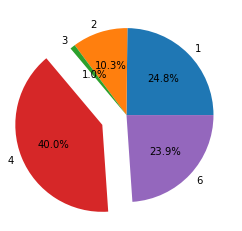

In [21]:
# autopct will convert to %

slices= [997, 414, 39, 1604, 960]
labels= [1,2,3,4,6]
explode=[0,0,0,0.3,0]
plt.pie(slices, labels= labels, autopct='%1.1f%%',  explode=explode)

In [22]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [23]:
# let's create an abbreviation for each team name

# create dictionary and map the dictionary to your dataframe

teams={'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions': 'GL', 'Kings XI Punjab': 'KXP',
       'Delhi Daredevils': 'DD', 'Chennai Super Kings': 'CSK', 'Rajasthan Royals': 'RR',
       'Deccan Chargers': 'DC', 'Kochi Tuskers Kerala': 'KTK', 'Pune Warriors': 'PW',
       'Rising Pune Supergiants': 'RPS'}

In [24]:
df['bowling_team']= df['bowling_team'].map(teams)

In [25]:
df['batting_team']= df['batting_team'].map(teams)

In [26]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [27]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [28]:
# do .grouopby based on 3 columns, and find 'total_runs'

# do .sum() on 'total_tuns'

df.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum()

match_id  inning  batting_team
1         1       SH              207
          2       RCB             172
2         1       MI              184
          2       RPS             187
3         1       GL              183
                                 ... 
634       2       KKR             140
635       1       GL              162
          2       SH              163
636       1       SH              208
          2       RCB             200
Name: total_runs, Length: 1284, dtype: int64

In [29]:
# if you want to convert this to dataframe, do... reset_index()

runs=  df.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()
runs

,match_id,inning,batting_team,total_runs
0,1,1,SH,207
1,1,2,RCB,172
2,2,1,MI,184
3,2,2,RPS,187
4,3,1,GL,183
...,...,...,...,...
1279,634,2,KKR,140
1280,635,1,GL,162
1281,635,2,SH,163
1282,636,1,SH,208


In [30]:
runs.drop('match_id', axis=1, inplace=True)
runs.head()

,inning,batting_team,total_runs
0,1,SH,207
1,2,RCB,172
2,1,MI,184
3,2,RPS,187
4,1,GL,183


In [31]:
inning1= runs[ runs['inning']==1]
inning2= runs[ runs['inning']==2]

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

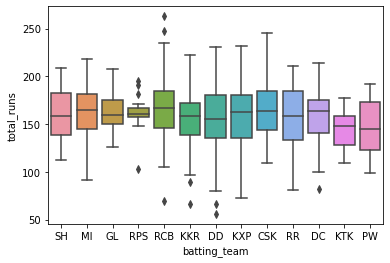

In [32]:
sns.boxplot(x='batting_team', y='total_runs',  data=inning1)

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

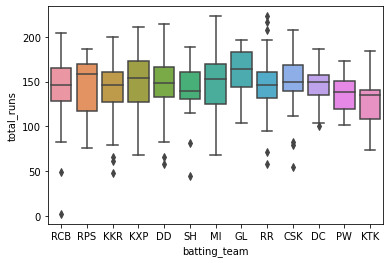

In [33]:
sns.boxplot(x='batting_team', y='total_runs', data=inning2)


In [34]:
runs2= df.groupby(['match_id', 'inning', 'bowling_team'])['total_runs'].sum().reset_index()
runs2

,match_id,inning,bowling_team,total_runs
0,1,1,RCB,207
1,1,2,SH,172
2,2,1,RPS,184
3,2,2,MI,187
4,3,1,KKR,183
...,...,...,...,...
1279,634,2,SH,140
1280,635,1,SH,162
1281,635,2,GL,163
1282,636,1,RCB,208


In [35]:
runs2.drop('match_id', axis=1, inplace=True)
runs2

,inning,bowling_team,total_runs
0,1,RCB,207
1,2,SH,172
2,1,RPS,184
3,2,MI,187
4,1,KKR,183
...,...,...,...
1279,2,SH,140
1280,1,SH,162
1281,2,GL,163
1282,1,RCB,208


In [40]:
# why doesn't it work when I do sns.boxplot for below codes??

inning3= [runs2 [runs2['inning']==1]]
inning4= [runs2 [runs2['inning']==2]]

In [42]:
# how many times teams score more than 200?

runs3= df.groupby(['match_id', 'inning', 'batting_team','bowling_team'])['total_runs'].sum().reset_index()
runs3

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SH,RCB,207
1,1,2,RCB,SH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183
...,...,...,...,...,...
1279,634,2,KKR,SH,140
1280,635,1,GL,SH,162
1281,635,2,SH,GL,163
1282,636,1,SH,RCB,208


In [44]:
score200= runs3[ runs3['total_runs']>=200]
score200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GL,213
62,32,1,SH,KXP,207
72,36,1,SH,KKR,209
...,...,...,...,...,...
1250,620,1,RCB,GL,248
1256,623,1,MI,DD,206
1262,626,1,RCB,KXP,211
1282,636,1,SH,RCB,208


C:\Users\Kate\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='batting_team', ylabel='count'>

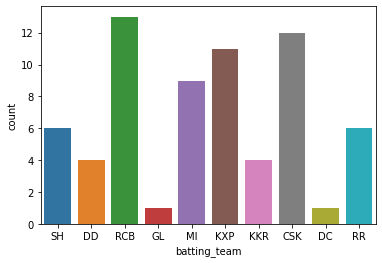

In [48]:
sns.countplot(score200['batting_team'])

C:\Users\Kate\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bowling_team', ylabel='count'>

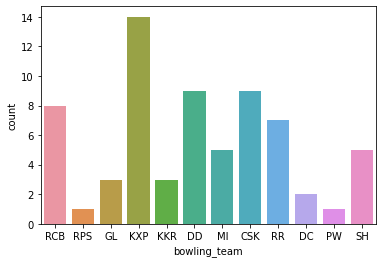

In [50]:
sns.countplot(score200['bowling_team'])